# Noise Analysis Test

### Imports

In [1]:
from noise import noise, TESnoisesim #import the noise class

import numpy as np
import matplotlib.pyplot as plt

from noise_utils import *
#import importlib


### Load test data


In [2]:
pathToTraces = ''
traces_PT_on = np.load(pathToTraces+'traces.npy')




### Create noise object


In [3]:
#savePath = 'example_Figs/' #used for test, user should define new path for test so they don't save over these figs
savePath = '' #user needs to define new path

sampleRate = 625e3 #define sample rate
channels = [ 'PCS1' , 'PES1' , 'PFS1' , 'PAS2' , 'PBS2' , 'PES2' , 'PDS2' ] #define the channel names
g124_noise = noise(traces_PT_on, sampleRate, channels) #initialize a noise object
g124_noise.name = 'G124 SLAC Run 37 Pulse Tube On'



### Calculate the PSD and corrCoeff

In [4]:
g124_noise.calculate_PSD()
g124_noise.calculate_corrCoeff()
g124_noise.calculate_CSD()



## Calculate unCorrelated noise

In [5]:
g124_noise.calculate_uncorr_noise()

### Test saving

In [6]:

#saveName = pathToTraces + g124_noise.name.replace(" ", "_") + '.pkl'
#g124_noise.save(pathToTraces)

In [7]:
#del g124_noise

In [8]:
#g124_noise = load_noise(saveName)




### Test plotting of PSD and corrCoeff

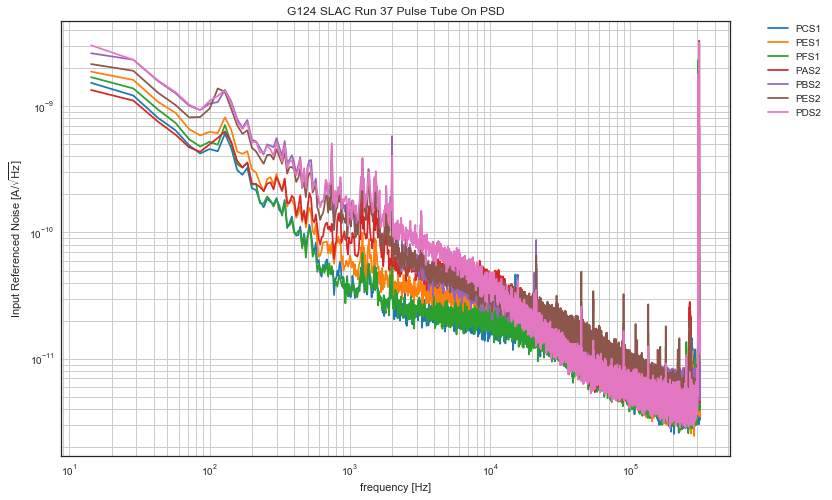

In [9]:
g124_noise.plot_PSD(lgc_overlay=True)


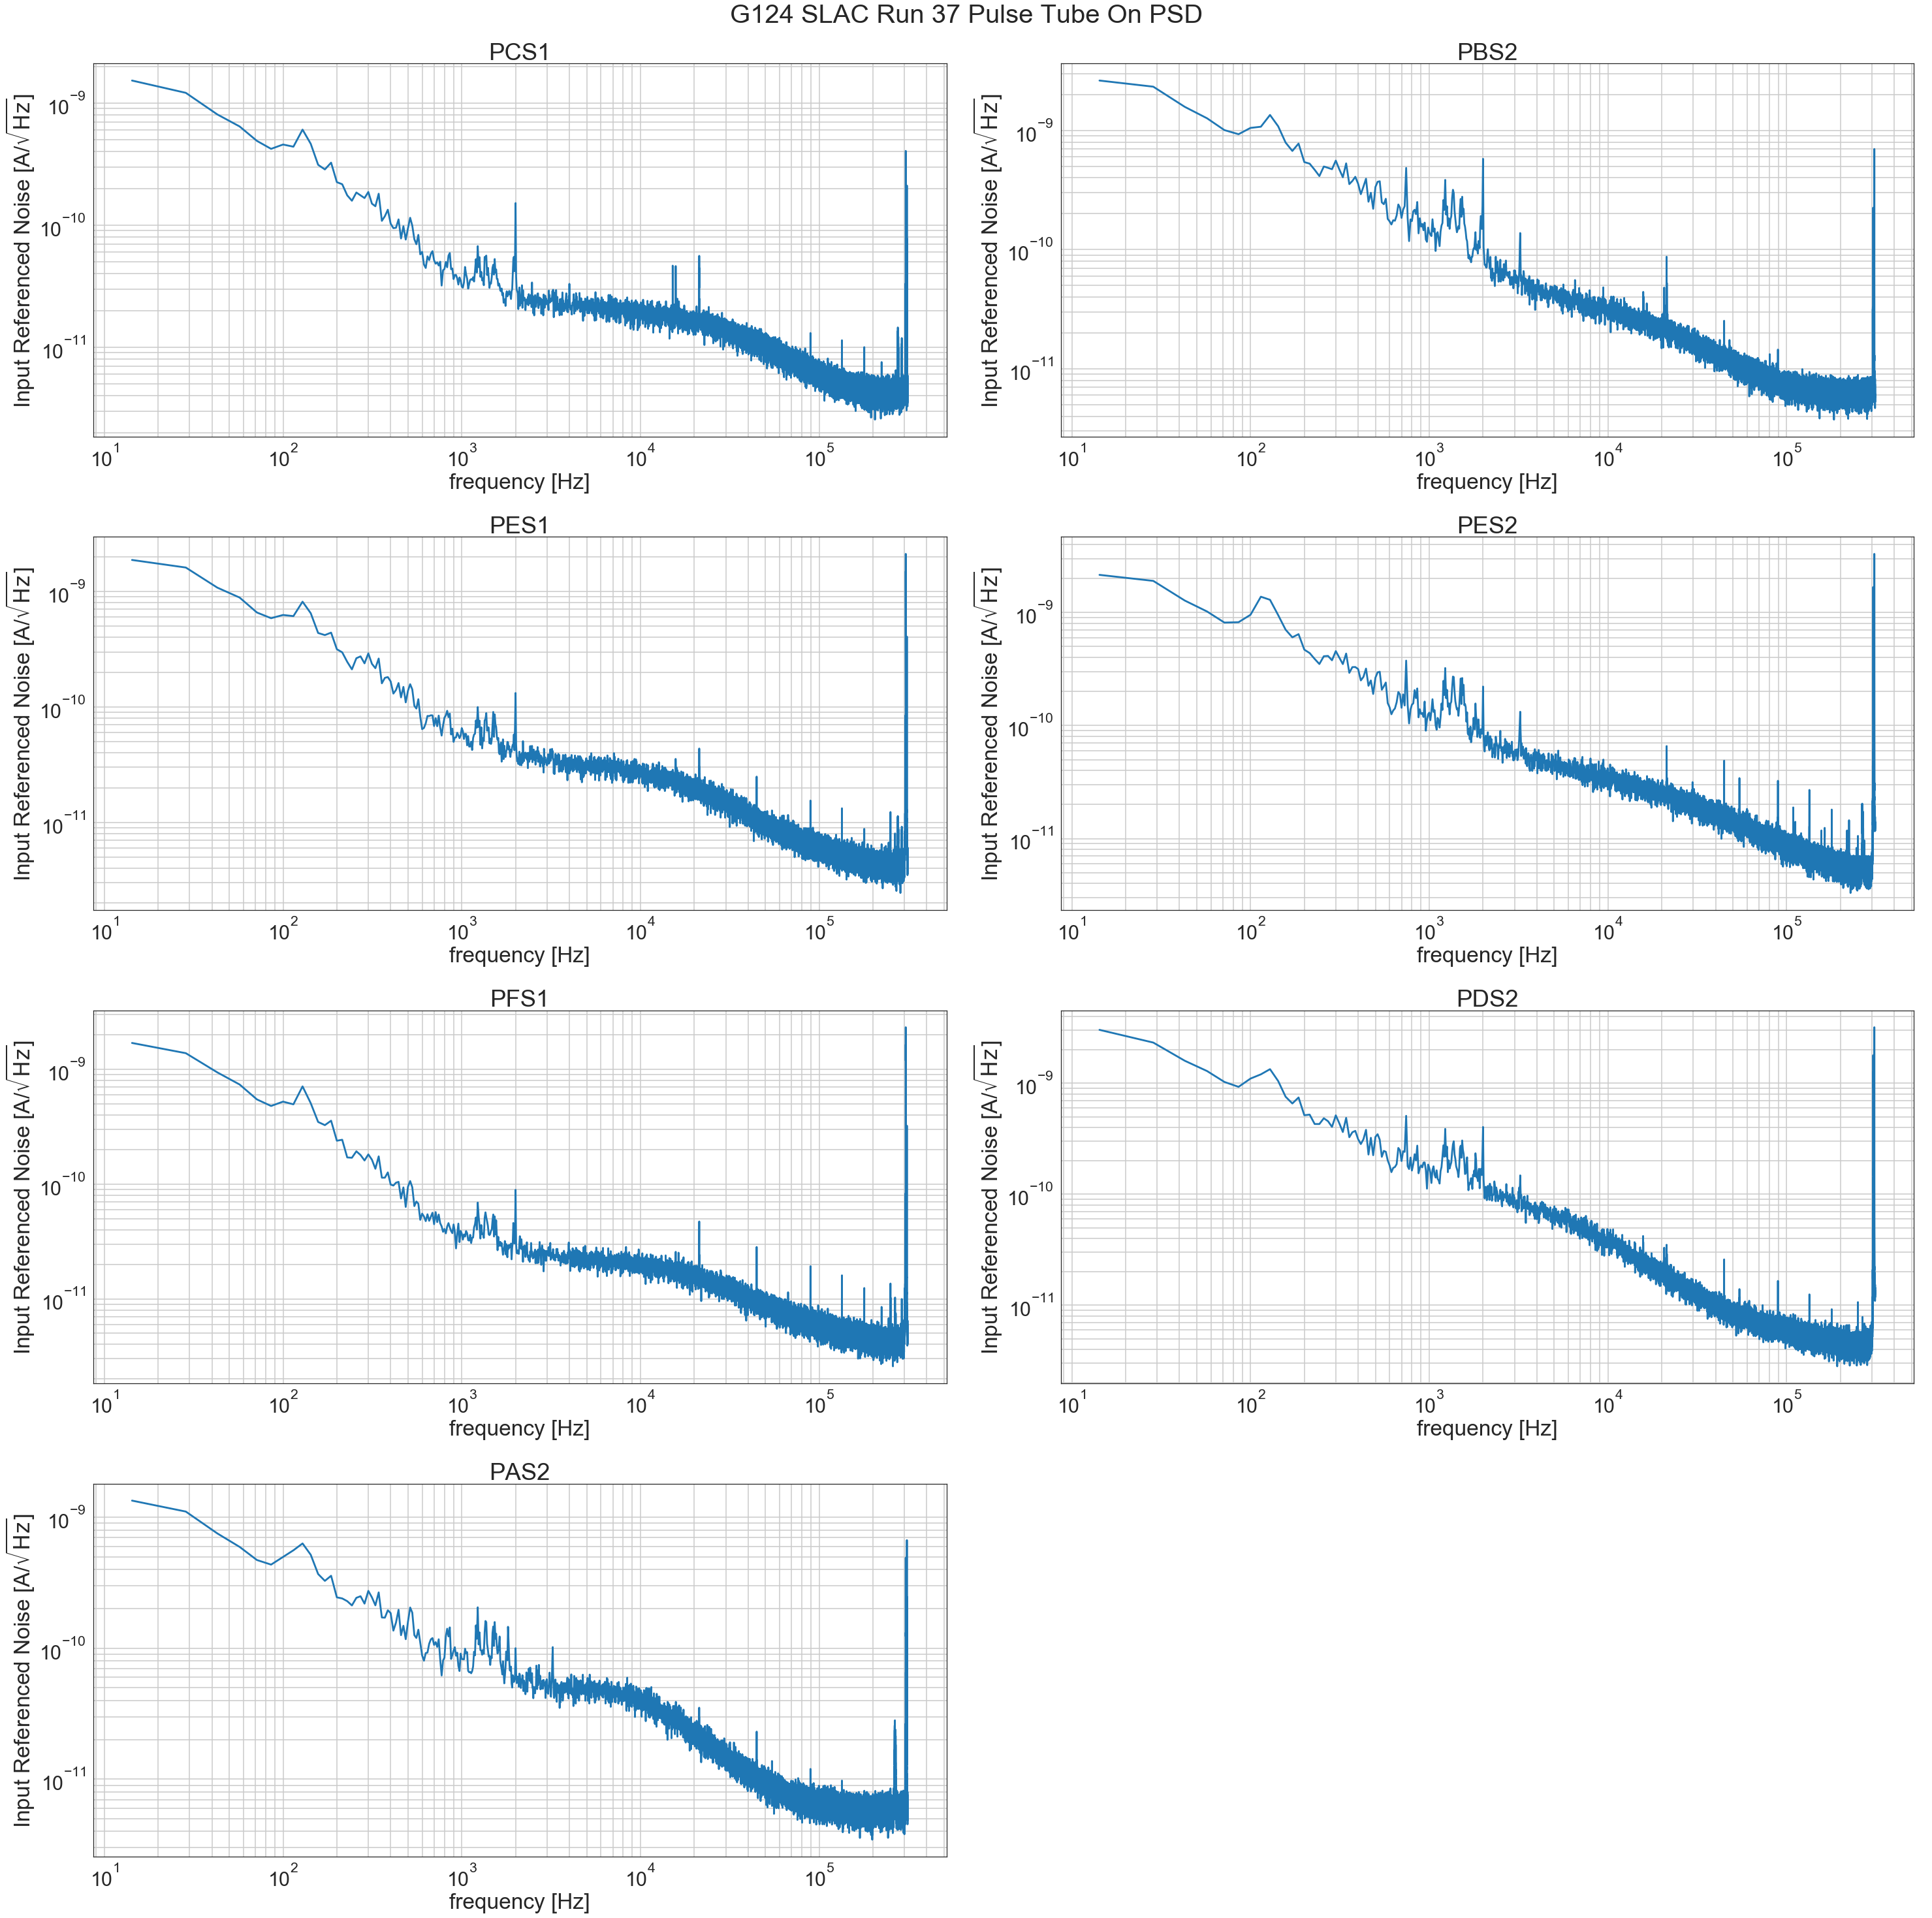

In [10]:
g124_noise.plot_PSD(lgc_overlay=False)

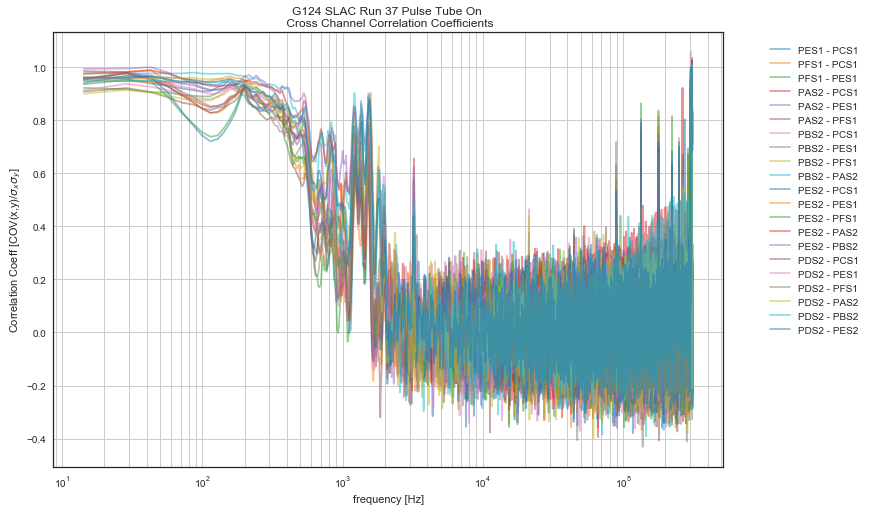

In [11]:
g124_noise.plot_corrCoeff(lgcSave=False,lgcSmooth=True, nWindow=13 )

## Plot a few CSDs

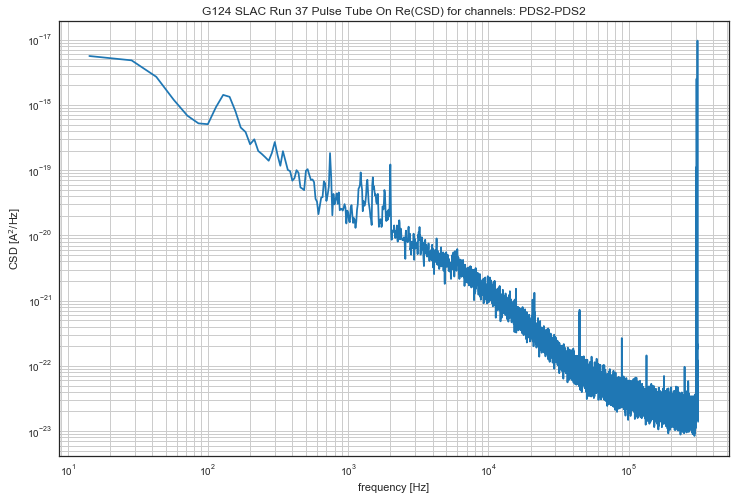

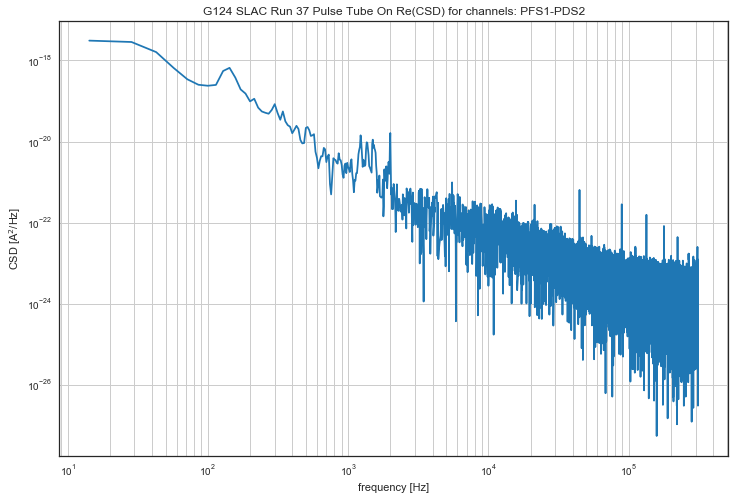

In [12]:
g124_noise.plot_CSD(whichCSD=['66','26'])

### Try to plot a CSD for a non existant channel

In [13]:
g124_noise.plot_CSD(whichCSD=['68'])

index out of range


### Try to save a figure with a bad path

Invalid save path. Figure not saved


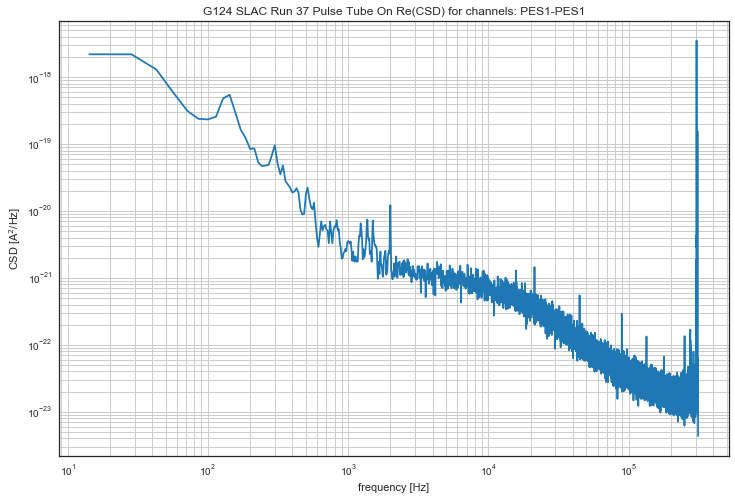

In [14]:
g124_noise.plot_CSD(whichCSD=['11'],lgcSave=True, savePath = 'yay/python/is/great')

## Plot Real vs Imaginary PSDs

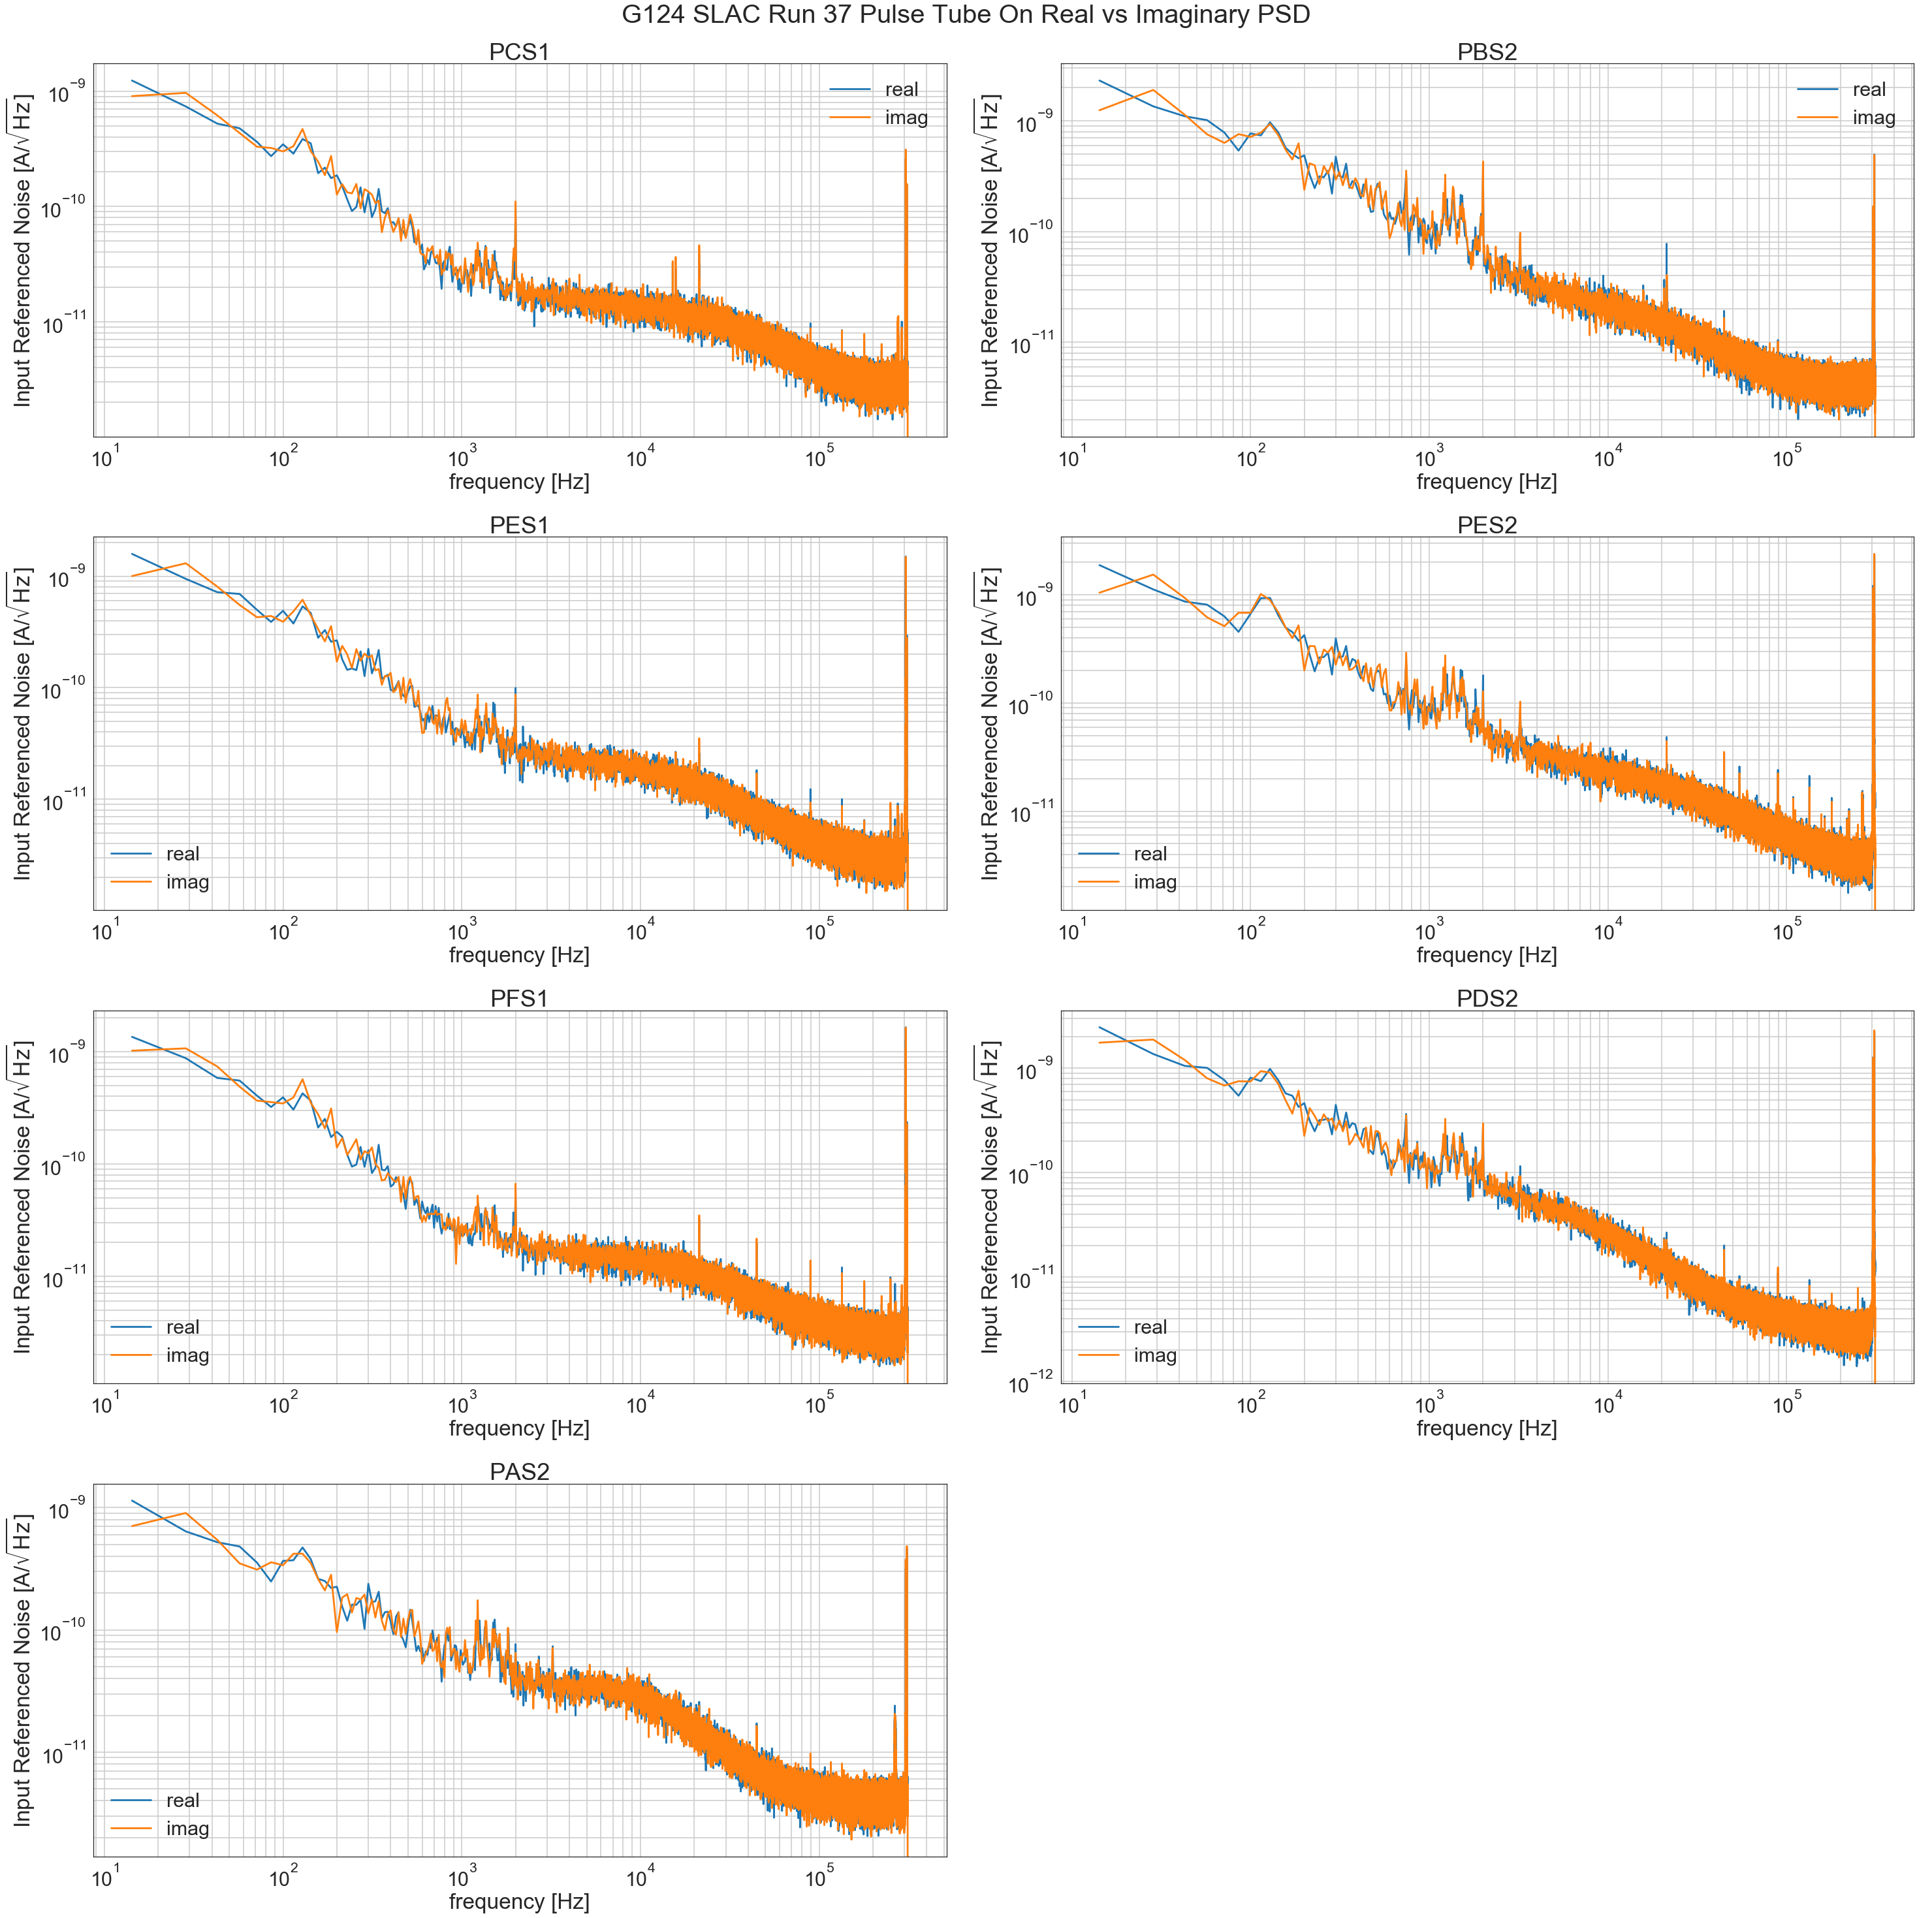

In [15]:
g124_noise.plot_ReIm_PSD()

## Plot unCorrelated part of the noise PSD

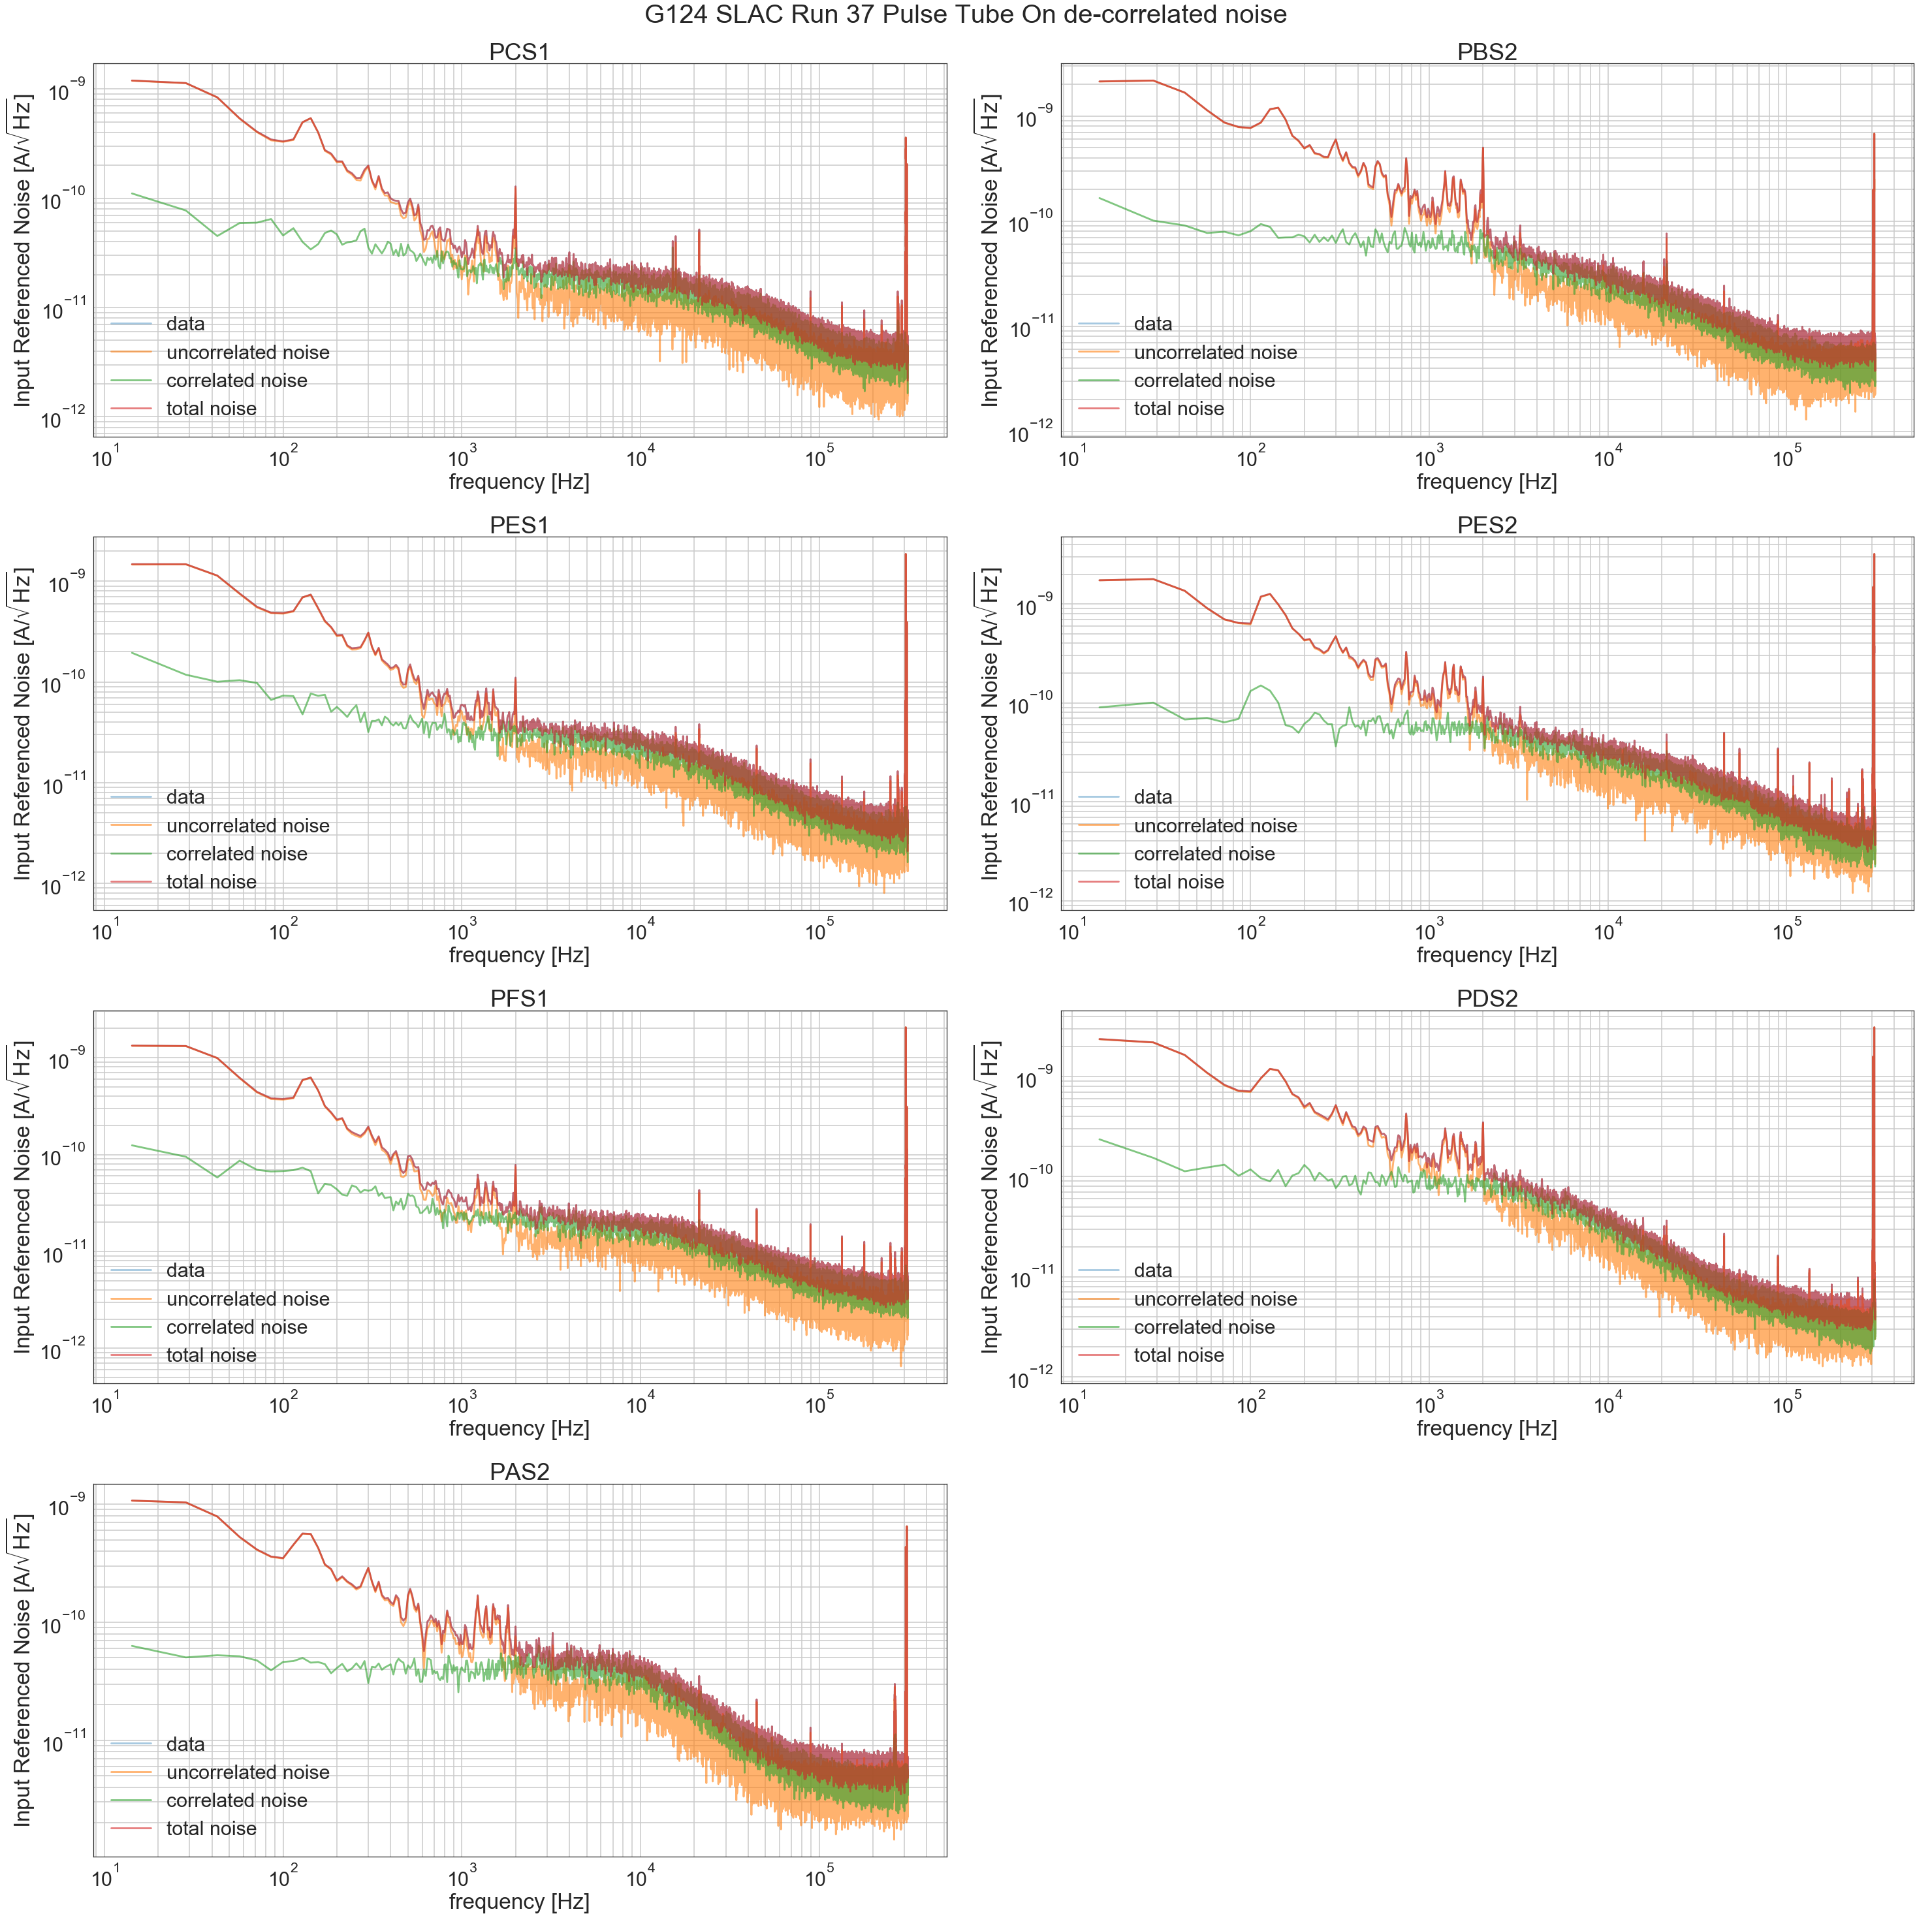

In [16]:

g124_noise.plot_deCorrelatedNoise(lgcCorrelated=True,lgcSum = True, lgcSave=False)

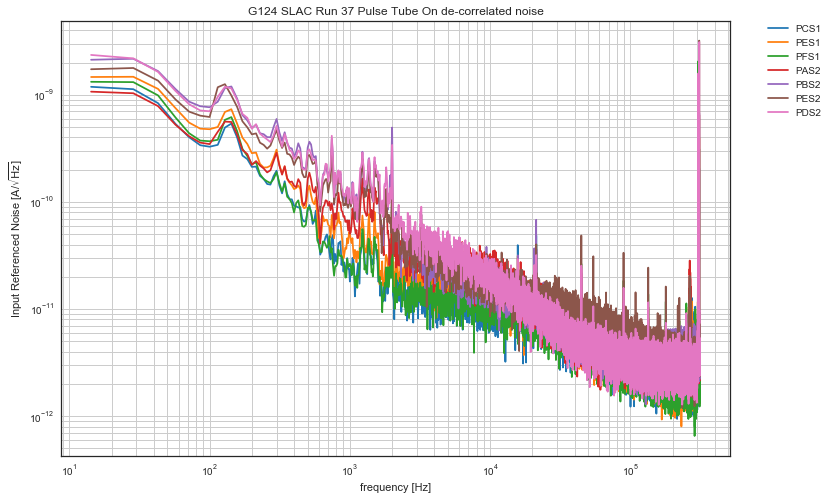

In [17]:
g124_noise.plot_deCorrelatedNoise(lgc_overlay = True)

## Test noise comparison plotting

### import traces, create new noise object and calculate PSD

In [18]:
#traces_PT_off = np.load(pathToTraces+'noise_traces_PT_off.npy')
#PT_off_noise = noise(traces_PT_off, sampleRate, channels, name = 'G124 SLAC Run 37 Pulse Tube Off')
#PT_off_noise.calculate_PSD()

In [19]:
#compare_noise(np.array([g124_noise,PT_off_noise]),g124_noise.channNames)

## Create noise simulation object

In [20]:
#importlib.reload(noise_utils)
noise_sim = TESnoisesim(freqs = g124_noise.freqs[1:])

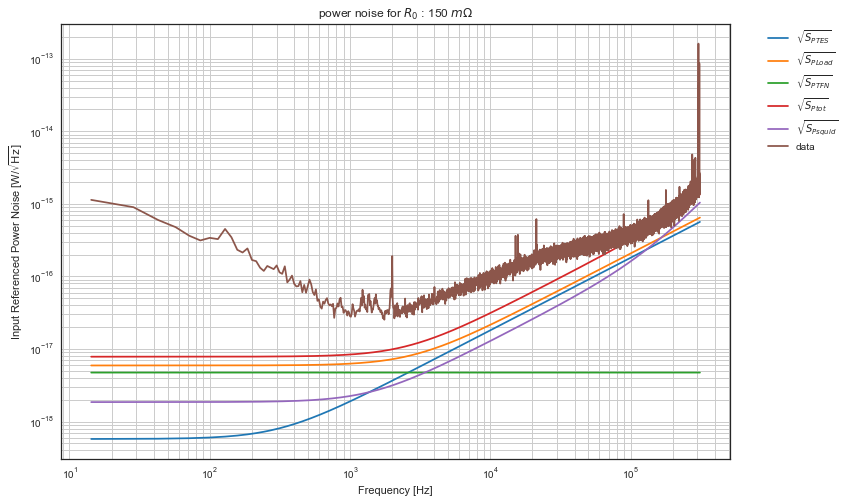

<module 'matplotlib.pyplot' from '/Users/cwfink/anaconda3/envs/bootcamp-env/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [21]:
plot_noise_sim(g124_noise.freqs,g124_noise.PSD[0,:], noise_sim, isType='power')